# Desafio

### Exercício: Explorando o Conjunto de Dados de Vendas de carros elétricos

**Objetivo:** Utilizar a biblioteca Pandas e Matplotlib para extrair e analisar informações dos conjuntos de dados de vendas de carros elétricos.
link: https://www.kaggle.com/datasets/patricklford/global-ev-sales-2010-2024

Desafios/etapas:
1. importar a biblioteca pandas no Jupyter
2. ler o arquivo .csv
3. apresentar informações básicas do dataset
4. limpar as linhas que possuirem dados vazios
5. plotar um gráfico do tipo "pie" verificando a contagem de cada tipo de veículos (coluna mode).
6. plotar um gráfico do tipo "bar" verificando as 10 primeiras regiões em quantidade de veículos.

In [39]:
#importar as bibliotecas
import pandas as pd #biblioteca para trabalhar com o arquivo .csv
import matplotlib.pyplot as plt #biblioteca para trabalhar com gráficos

In [41]:
#Ler o arquivo .csv
df = pd.read_csv('../dataset/IEA Global EV Data 2024.csv')

In [43]:
#Apresentar as 5 primeiras linhas do dataFrame
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [45]:
#Informaçõe gerais
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


,year,value
count,12654.000000,1.265400e+04
mean,2019.822112,4.273742e+05
std,5.476494,6.860498e+06
min,2010.000000,1.200000e-06
25%,2016.000000,2.000000e+00
50%,2020.000000,1.300000e+02
75%,2022.000000,5.500000e+03
max,2035.000000,4.400000e+08


In [47]:
#verificar valores duplicados
df.duplicated().sum() #caso aparecer 0 significa que não tem linhas iguais

0

In [49]:
#verificar valores vazios por coluna
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [51]:
#Pie
df.head()
df['unit'].unique() #tomar cuidado pois 'mode' é uma palavra reservada
#A coluna unit possui valores de unidades diferentes portanto será necessários
#definir a unidada para ser analisada

#A unidade será 'vehicles' portanto é necessário criar um novo dataframe
#com apenas essas linhas
df_vehicles = df.loc[df['unit'] == 'Vehicles']

In [53]:
df_vehicles['unit'].unique() #verifico os tipos únicos da coluna 'unit'

array(['Vehicles'], dtype=object)

([<matplotlib.patches.Wedge at 0x2444bf87a70>,
 [Text(0.2236940701869681, 1.0770148387850504, 'Cars'),
  Text(-1.059475175108288, -0.29582486935560853, 'Buses'),
  Text(0.05351735479744666, -1.0986973617586802, 'Vans'),
  Text(1.0005952318392295, -0.45695643339447445, 'Trucks')],
 [Text(0.12201494737470986, 0.5874626393373001, '43.5%'),
  Text(-0.5778955500590661, -0.1613590196485137, '21.7%'),
  Text(0.0291912844349709, -0.5992894700501892, '21.2%'),
  Text(0.5457792173668524, -0.2492489636697133, '13.6%')])

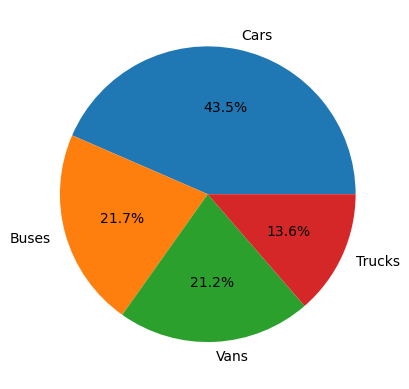

In [55]:
#gráfico pie(torta)
etiquetas = df_vehicles['mode'].unique()  #verifico os tipos únicos da coluna 'mode'
valores_etiquetas = df_vehicles['mode'].value_counts()
plt.pie(valores_etiquetas, labels=etiquetas, autopct='%1.1f%%')

In [57]:
df_vehicles.head()

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0


In [59]:
#Quando se agrupa o dataframe por região e somando a coluna 'value' existe uma transformação do dataframe
#para dicionário.
dictionary_vehicles = df_vehicles.groupby('region')['value'].sum()
dictionary_vehicles.keys()

Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'EU27', 'Estonia', 'Europe', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania',
       'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Rest of the world', 'Romania', 'Seychelles',
       'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Turkiye', 'USA', 'United Arab Emirates',
       'United Kingdom', 'World'],
      dtype='object', name='region')

In [61]:
#O tipo de dado dicionário não possui os métodos do dataframe portanto é necessário converte-lo
df_vehicles_region = pd.DataFrame(dictionary_vehicles.items(), columns=['Regiões', 'Valores'] )
df_vehicles_region.loc[(df_vehicles_region['Regiões'] != 'World') &
                (df_vehicles_region['Regiões'] != 'Rest of the world')] \
                .sort_values(by=['Valores'], ascending = False).head(10)

,Regiões,Valores
7,China,1.148052e+09
16,Europe,5.937754e+08
48,USA,4.112801e+08
23,India,6.341878e+07
14,EU27,3.324256e+07
19,Germany,1.020111e+07
18,France,6.787772e+06
50,United Kingdom,6.283637e+06
35,Norway,4.793634e+06
27,Japan,3.603756e+06


In [76]:
df_vehicles_region = pd.DataFrame(dictionary_vehicles.items(), columns=['Regiões', 'Valores'] )
df_top_ten = df_vehicles_region.loc[(df_vehicles_region['Regiões'] != 'World') &
                (df_vehicles_region['Regiões'] != 'Rest of the world')] \
                .sort_values(by=['Valores'], ascending = False).head(10)

<BarContainer object of 10 artists>

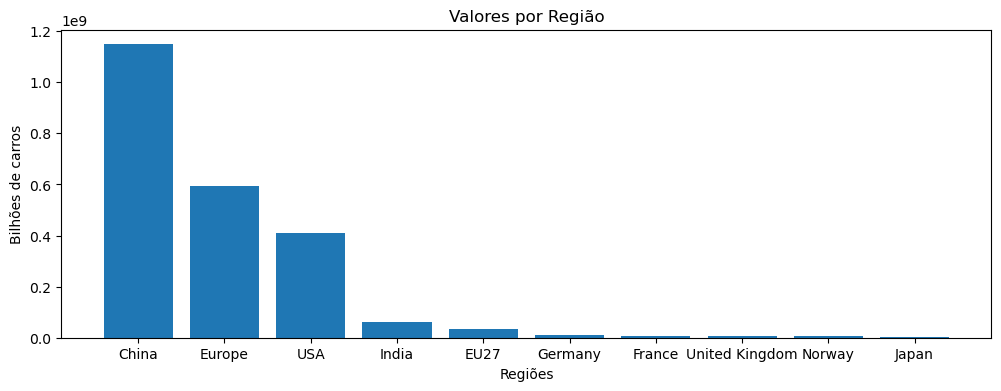

In [92]:
df_top_ten

x = df_top_ten['Regiões']
y = df_top_ten['Valores']
plt.figure(figsize = (12,4))
plt.title('Valores por Região')
plt.xlabel('Regiões')
plt.ylabel('Bilhões de carros')
plt.bar(x, y)

In [86]:
df_vehicles['year'].head()

2    2011
3    2011
4    2012
5    2012
8    2012
Name: year, dtype: int64